<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Australian(AXJO)_200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 AXJO(S&P/ASX 200) is stock market Australian Securities Exchange.

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=1816a84a1514886973d24d455f152625e60fda814e6ef98495e56cd391377294
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [4]:
df = yf.download('^AXJO',
start='1985-01-01',
end='2021-08-12',
progress=False)

In [5]:
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [6]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [7]:
df[['simple_rtn','log_rtn']].tail(20)

,simple_rtn,log_rtn
Date,,
2021-07-16,0.001663,0.001662
2021-07-19,-0.008451,-0.008487
2021-07-20,-0.004639,-0.004650
2021-07-21,0.007791,0.007761
2021-07-22,0.010631,0.010575
2021-07-23,0.001083,0.001082
2021-07-26,-0.000014,-0.000014
2021-07-27,0.005017,0.005005
2021-07-28,-0.007011,-0.007035


In [8]:
def realized_volatility(x):
 return np.sqrt(np.sum(x**2))
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
df_rv.rv = df_rv.rv * np.sqrt(12)

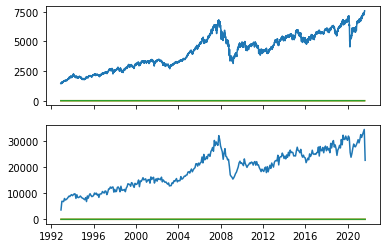

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

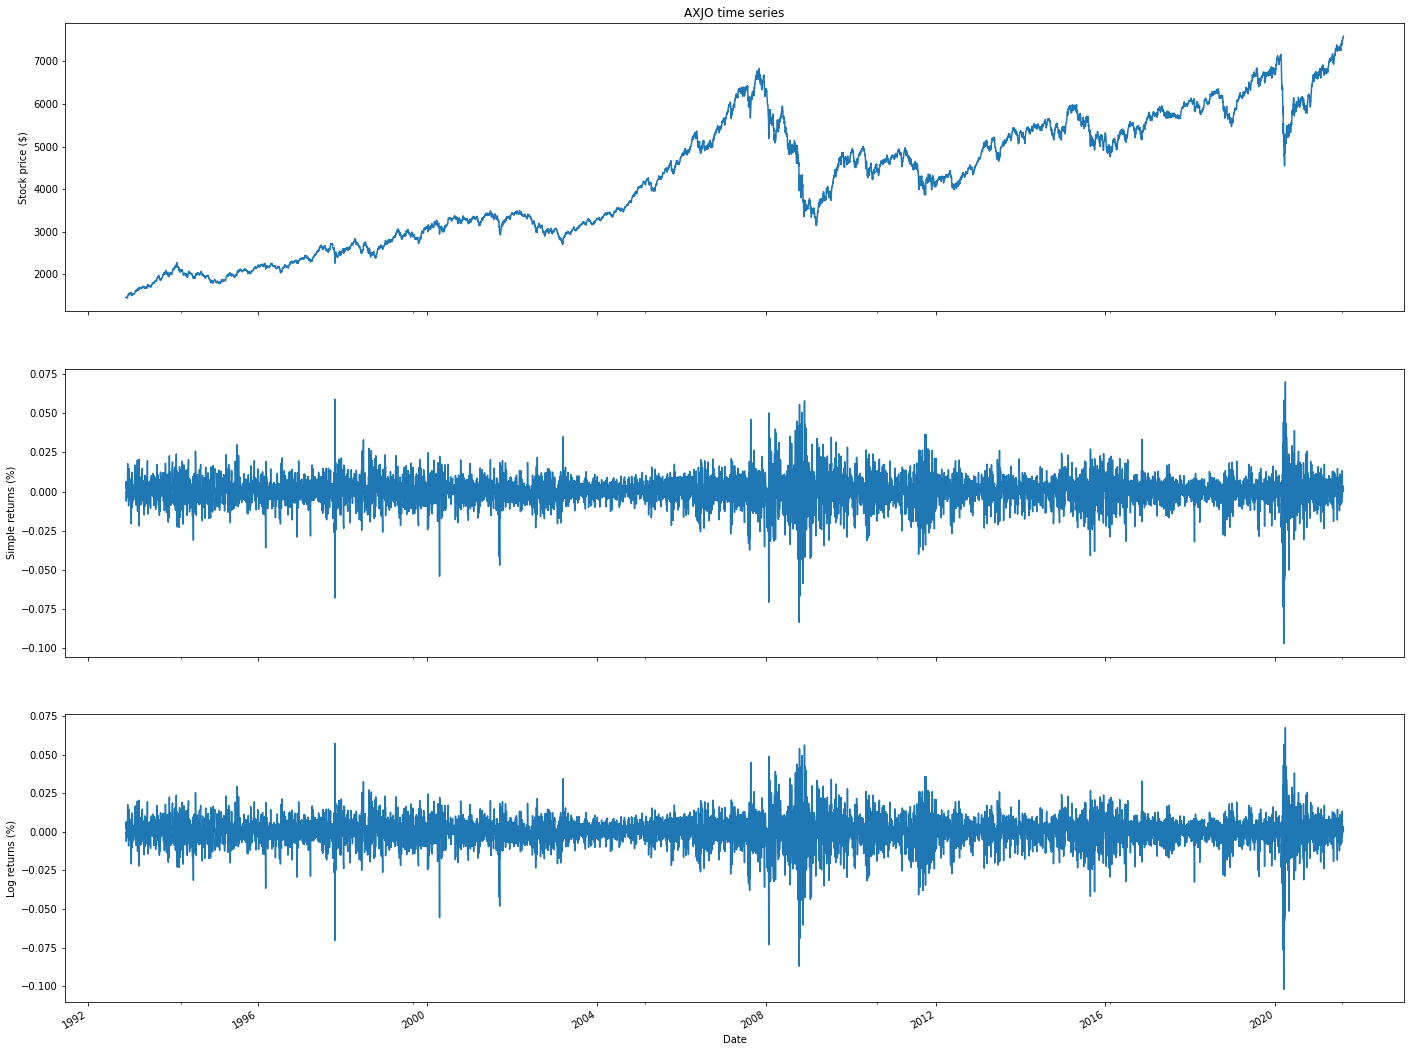

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'AXJO time series',
ylabel = 'Stock price ($)')
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date',
ylabel = 'Log returns (%)')

In [11]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [12]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [13]:
c

In [14]:
def indentify_outliers(row, n_sigmas=3):
   x = row['simple_rtn']
   mu = row['mean']
   sigma = row['std']
   if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
    return 1
   else:
    return 0

In [15]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers,
axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1,
['simple_rtn']]

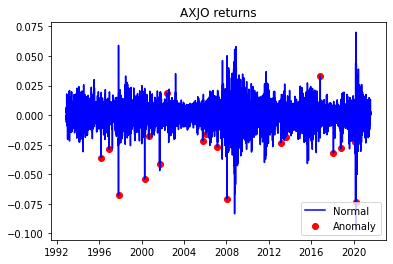

In [16]:
fig, ax = plt.subplots()
ax.plot(df_outliers.index, df_outliers.simple_rtn,
color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn,
color='red', label='Anomaly')
ax.set_title("AXJO returns")
ax.legend(loc='lower right')

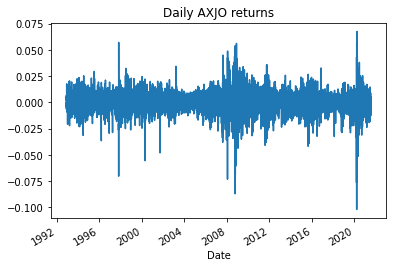

In [ ]:
df.log_rtn.plot(title='Daily AXJO returns')

In [ ]:
df = yf.download(['^AXJO', '^VIX'],
start='1985-01-01',
end='2021-07-10',
progress=False)

In [ ]:
df.tail()

Adj Close                   Close  ...       Open    Volume     
                  ^AXJO       ^VIX        ^AXJO  ...       ^VIX     ^AXJO ^VIX
Date                                             ...                          
2021-07-05  7315.000000        NaN  7315.000000  ...        NaN  548300.0  NaN
2021-07-06  7261.799805  16.440001  7261.799805  ...  15.770000  552700.0  0.0
2021-07-07  7326.899902  16.200001  7326.899902  ...  16.430000  705200.0  0.0
2021-07-08  7341.399902  19.000000  7341.399902  ...  17.740000  574000.0  0.0
2021-07-09  7251.799805  16.180000  7251.799805  ...  17.879999  621900.0  0.0

[5 rows x 12 columns]

In [ ]:
df = df[['Adj Close']]

In [ ]:
df.tail()

Adj Close           
                  ^AXJO       ^VIX
Date                              
2021-07-05  7315.000000        NaN
2021-07-06  7261.799805  16.440001
2021-07-07  7326.899902  16.200001
2021-07-08  7341.399902  19.000000
2021-07-09  7251.799805  16.180000

In [ ]:
df.columns = df.columns.droplevel(0)

In [ ]:
df = df.rename(columns={'^AXJO': 'axjo', '^VIX': 'vix'})

In [ ]:
df['log_rtn'] = np.log(df.axjo / df.axjo.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))

In [ ]:
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf

In [23]:
aus = yf.download('^AXJO',
start='1985-01-01',
end='2021-08-12',
progress=False)

In [24]:
aus.tail(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,7415.899902,7506.299805,7414.899902,7491.399902,7491.399902,576300
2021-08-03,7495.700195,7495.899902,7455.500000,7474.500000,7474.500000,623300
2021-08-04,7485.600098,7509.200195,7477.600098,7503.200195,7503.200195,499700
2021-08-05,7498.299805,7526.399902,7493.000000,7511.100098,7511.100098,510300
2021-08-06,7502.799805,7538.399902,7497.299805,7538.399902,7538.399902,539400
2021-08-09,7537.799805,7567.000000,7532.799805,7538.399902,7538.399902,526800
2021-08-10,7549.399902,7576.299805,7537.100098,7562.600098,7562.600098,525100
2021-08-11,7574.899902,7615.100098,7572.700195,7584.299805,7584.299805,643200
2021-08-12,7584.299805,7608.600098,7571.500000,7588.200195,7588.200195,0


In [25]:
import matplotlib.pyplot as plt

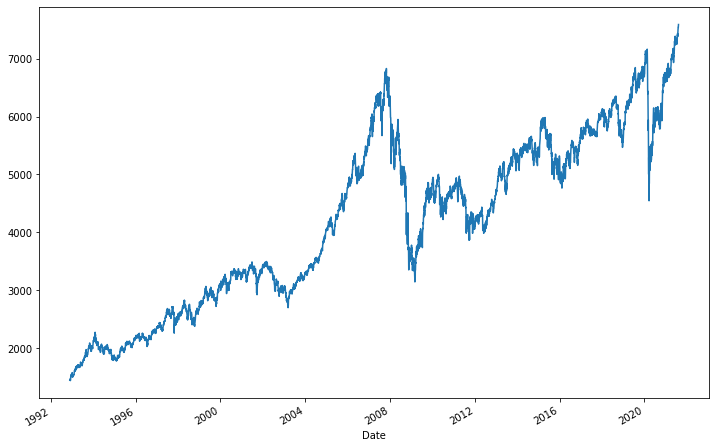

In [26]:
aus['Close'].plot(figsize=(12,8))

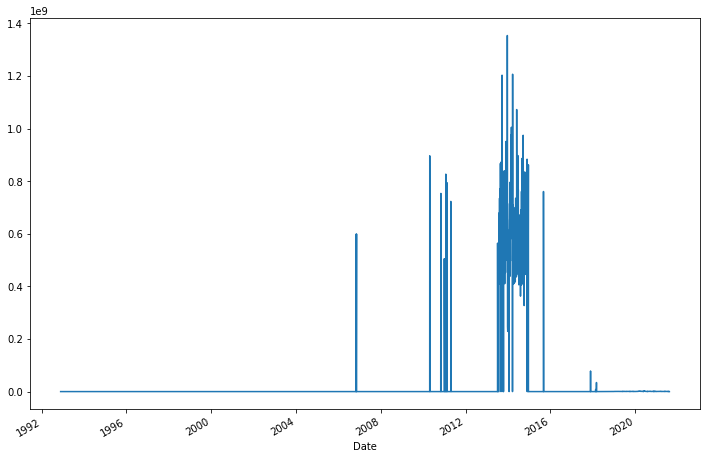

In [27]:
aus['Volume'].plot(figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6df56c0110>,
      dtype=object)

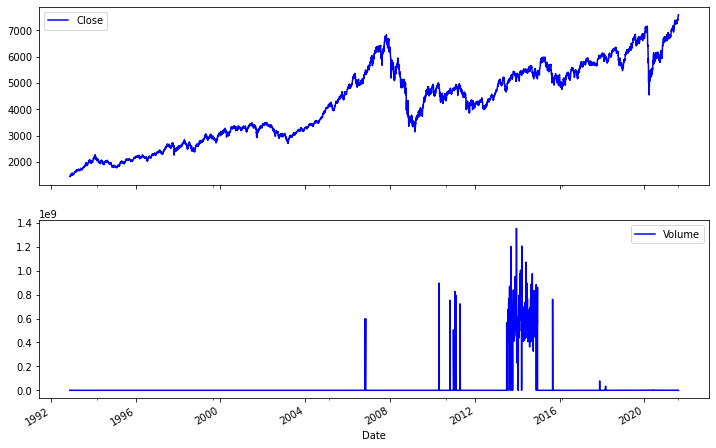

In [28]:
aus[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))

In [29]:
aus.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7.134000e+03
mean,4231.898095,4251.074210,4212.752145,4232.379704,4232.379704,3.094916e+07
std,1484.367746,1495.583039,1473.249982,1484.725191,1484.725191,1.375298e+08
min,1442.099976,1442.099976,1442.099976,1442.099976,1442.099976,0.000000e+00
25%,3010.700073,3023.525024,3000.299988,3010.375061,3010.375061,0.000000e+00
50%,4350.949951,4374.050049,4328.250000,4350.849854,4350.849854,0.000000e+00
75%,5452.575073,5478.249878,5423.974976,5452.824951,5452.824951,0.000000e+00
max,7584.299805,7615.100098,7572.700195,7588.200195,7588.200195,1.353735e+09


In [31]:
aus['simple_rtn'] = aus.Close.pct_change()

In [32]:
aus['log_rtn'] = np.log(aus.Close/aus.Close.shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6df5591f90>],
      dtype=object)

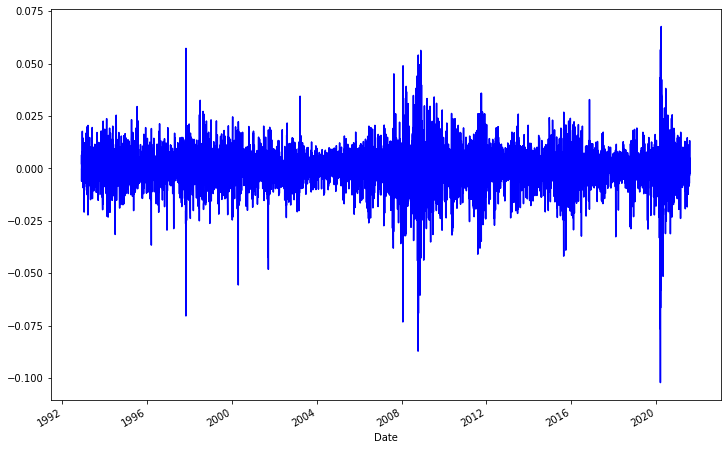

In [33]:
aus['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [34]:
aus['log_rtn'].tail(12)

Date
2021-07-28   -0.007035
2021-07-29    0.005150
2021-07-30   -0.003349
2021-08-02    0.013276
2021-08-03   -0.002258
2021-08-04    0.003832
2021-08-05    0.001052
2021-08-06    0.003628
2021-08-09    0.000000
2021-08-10    0.003205
2021-08-11    0.002865
2021-08-12    0.000514
Name: log_rtn, dtype: float64

In [40]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [41]:
df_rolling = aus[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

In [42]:
df_rolling.columns = df_rolling.columns.droplevel()

In [44]:
df_outliers = aus.join(df_rolling)

In [45]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [50]:
df = yf.download(['^AXJO', '^VIX'],
start='1985-01-01',
end='2021-08-12',
progress=False)

In [51]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^AXJO': 'axjo', '^VIX': 'vix'})

In [52]:
df.tail()

,axjo,vix
Date,,
2021-08-06,7538.399902,16.150000
2021-08-09,7538.399902,NaN
2021-08-10,7562.600098,16.790001
2021-08-11,7584.299805,16.170000
2021-08-12,7588.200195,NaN


In [54]:
df['log_rtn'] = np.log(df.axjo / df.axjo.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [55]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'AXJO log returns'),
 Text(0.5, 1.0, 'AXJO vs. VIX ($\\rho$ = -0.12)')]

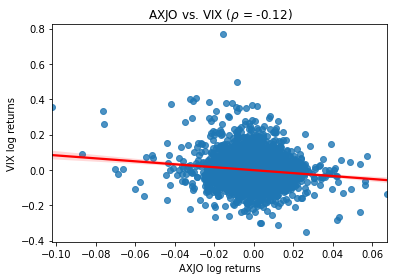

In [56]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'AXJO vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='AXJO log returns')

In [57]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

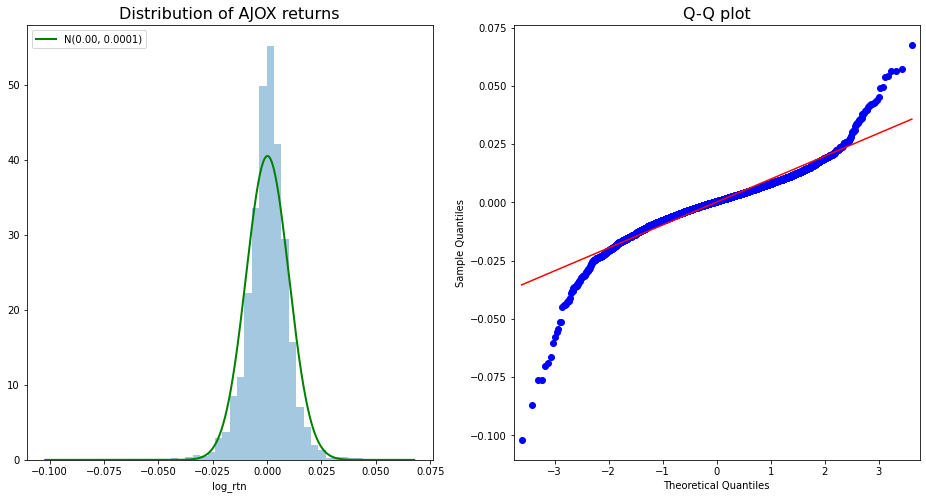

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of AJOX returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [59]:
df['log_rtn'].tail()

Date
2021-08-03   -0.002258
2021-08-04    0.003832
2021-08-05    0.001052
2021-08-06    0.003628
2021-08-11    0.002865
Name: log_rtn, dtype: float64

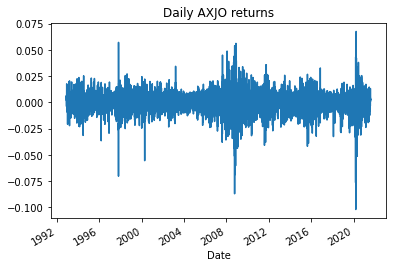

In [66]:
df.log_rtn.plot(title='Daily AXJO returns')

In [61]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

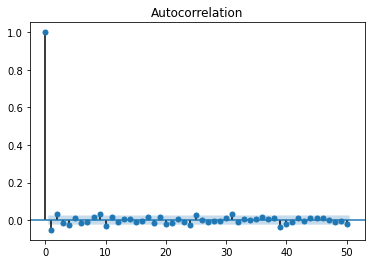

In [62]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

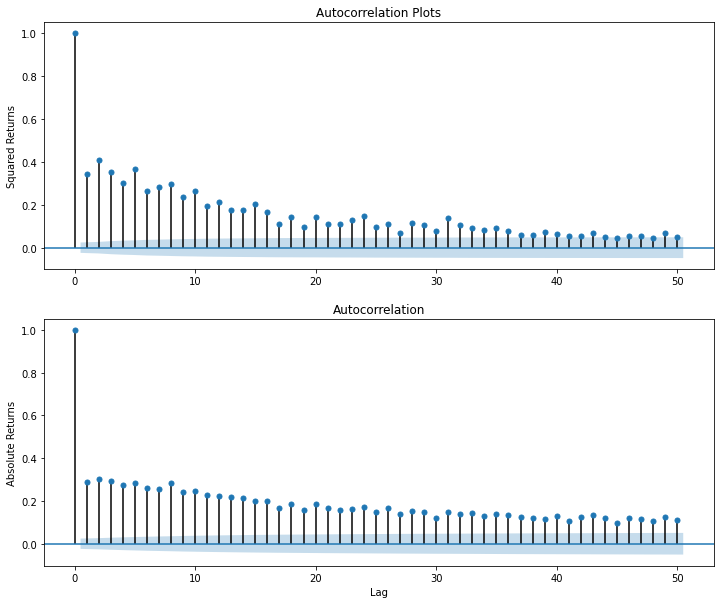

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [64]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

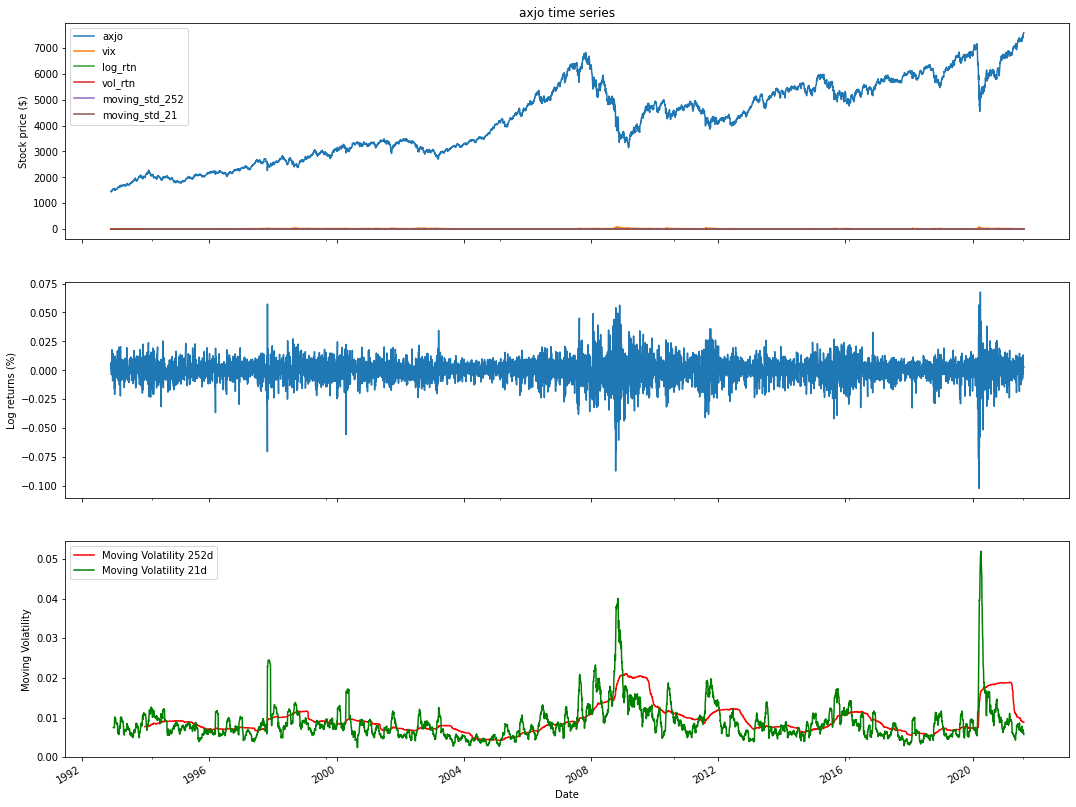

In [65]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='axjo time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()